# Eixos, Escalas e Sistemas de Coordenadas

Definir escalas de posição é imprescindível para visualizar informações, especialmente quantitativas. Escalas de posição em conjunto com um arranjo geométrico formam um _sistema de coordenadas_.

O sistema de coordenadas mais comum que utilizamos é o Cartesiano, em que o eixo de abscissas (geralmente representado pela variável $x$) corre horizontalmente e o de ordenadas (geralmente representado pela variável $y$) corre verticalmente. Entretanto, a maneira de relacionar dados poderia ocorrer com $y$ correndo de maneira oblíqua em relação a $y$, ou com $y$ mudando de maneira circular e $x$ de maneira radial. Neste último caso, teríamos um _sistema de coordenadas polares_. 

Escalas ajudam a posicionar a informação e a criar representações visuais com _razões de aspecto_ distintas. Figuras esticadas na direção vertical e estreitas na direção horizontal enfatizarão um sentido de "crescer para cima", por exemplo. Por outro lado, figuras compridas na direção horizontal e encurtadas na direção vertical podem dar uma ideia de algo que se "prolonga para o lado". Definir razões de aspecto é uma escolha totalmente dependente do projeto visual. 

## Sistemas cartesianos e razões de aspecto

Vejamos um exemplo de como criar representações visuais cartesianas com diferentes razões de aspecto.

### Sinal estocástico

Um sinal estocástico (ou aleatório) é aquele em que nenhuma previsibilidade ou padrão são detectáveis. Comportamentos estocásticos estão presentes em eventos climáticos, ativos do mercado financeiro, sistemas eletrônicos e audiovisuais, atividades bioquímicas e em muitas outras áreas. Casos típicos buscam visualizar como uma dada grandeza varia em função do tempo.

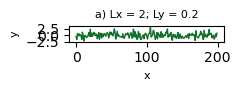

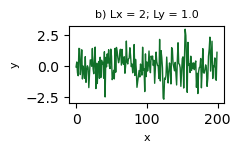

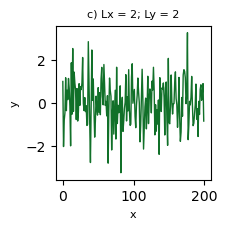

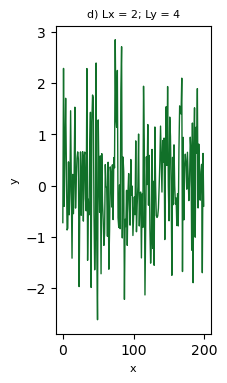

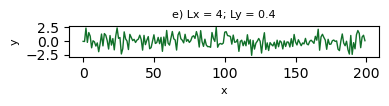

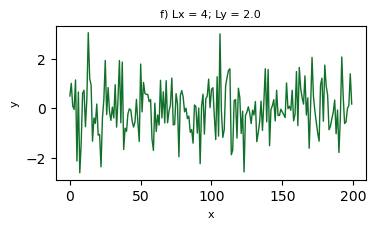

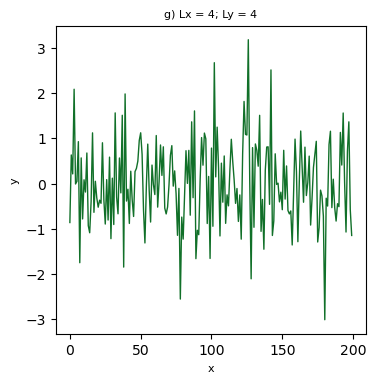

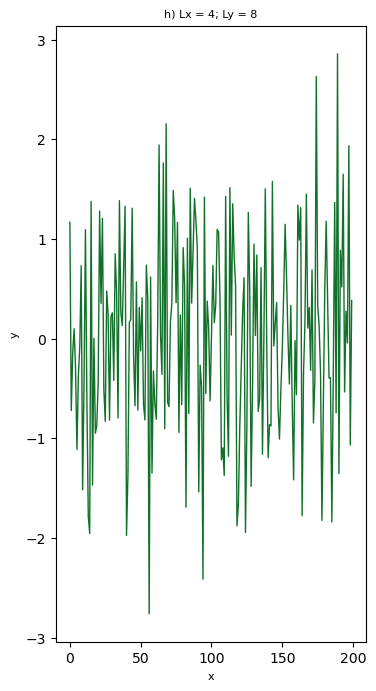

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from string import ascii_lowercase as lc

def test_aspect_ratio(Lx,fator,tag):
    
    dist = np.random.normal(size=(200),loc=0.0,scale=1.0)
    
    fig, ax = plt.subplots(figsize=(Lx,fator*Lx))
    
    ax.plot(dist,lw=1.0,c='#117029')
    ax.set_xlabel('x',fontsize=8)
    ax.set_ylabel('y',fontsize=8)
    
    ax.set_title(f'{tag}) Lx = {Lx}; Ly = {fator*Lx}',fontsize=8)

c = 0
for Lx in [2,4]:
    for fator in [0.1,0.5,1,2]:
        test_aspect_ratio(Lx,fator,lc[c])
        c += 1


Dos casos anteriores, haja vista a natureza da informação plotada, percebe-se que nem todas possuem um visual agradável. Na sua opinião, alguma representação visual é a mais adequada? Para tomar a decisão de escolha, que critério(s) você usaria?

```{admonition} Dica
:class: dropdown
Para aprofundamento, estude sobre o controle de razão de aspecto de eixos com ax.axis() no Guia Rápido de Plotagem - matplotlib.
```

### Série temporal

A visualização abaixo corresponde a dados reais de montantes repassados pela Petrobras ao Fundo Amazônia - BNDES entre 2012 e 2018 de acordo com o Ministério do Meio Ambiente.

In [262]:
import pandas as pd
import seaborn as sns

# dados 
f_amaz = pd.read_csv('../data/petr-repasse-redd-amazonia.csv')
f_amaz.drop(index=0,inplace=True)
f_amaz

ano    repasse
1  2012  324160.00
2  2013  495328.65
3  2014  601357.20
4  2015  880310.00
5  2016  276642.00
6  2017  578063.10
7  2018  347037.35

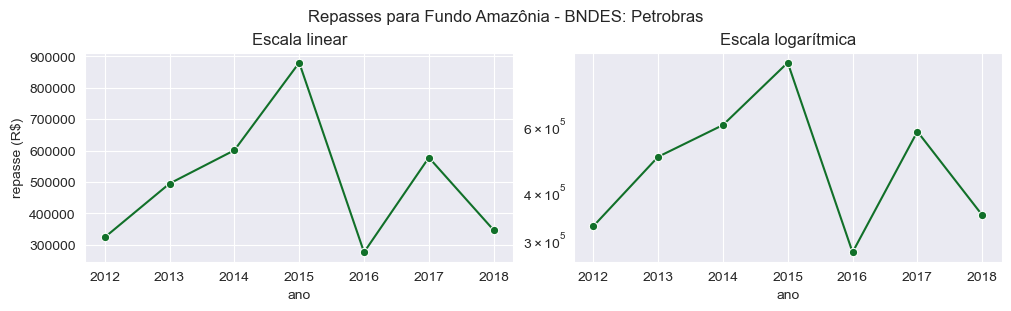

In [263]:
# visualização
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2,figsize=(10,3),constrained_layout=True)
fig.suptitle('Repasses para Fundo Amazônia - BNDES: Petrobras')

f = sns.lineplot(x='ano',y='repasse',data=f_amaz, marker='o',c='#117029',ax=ax[0])
f.set_title('Escala linear');
f.set_ylabel('repasse (R$)');

f = sns.lineplot(x='ano',y='repasse',data=f_amaz, marker='o',c='#117029',ax=ax[1])
f.set(yscale='log') # 'linear', 'log', 'symlog', 'logit', 'function', 'functionlog'
f.set_title('Escala logarítmica');
f.set_ylabel('');


Este exemplo lida com valores financeiros. No primeiro caso, a escala do eixo _y_ é linear; no segundo, é _logarítmica_, isto é, não linear. 

Há situações em que escalas não lineares para os eixos mostram-se mais adequadas do que escalas não lineares. Os exemplos a seguir fazem essas diferenciações.

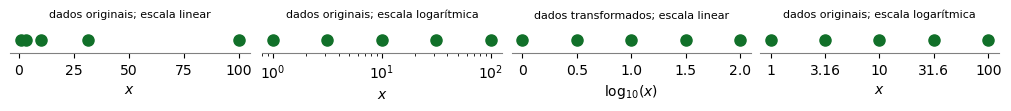

In [264]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc_file_defaults()

# dados
x = np.array([1,3.16,10,31.6,100])

# figuras
fig, ax = plt.subplots(1,4,figsize=(10,1),constrained_layout=True)

# plotagens
ax[0].plot(x,0*x,'o',ms=8,c='#117029')
ax[0].get_yaxis().set_visible(False)
ax[0].axis('equal')
ax[0].spines['bottom'].set_color('gray')
ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlabel('$x$')
ax[0].set_title('dados originais; escala linear',fontsize=8)

ax[1].semilogx(x,0*x,'o',ms=8,c='#117029')
ax[1].get_yaxis().set_visible(False)
ax[1].axis('equal')
ax[1].spines['bottom'].set_color('gray')
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlabel('$x$')
ax[1].set_title('dados originais; escala logarítmica',fontsize=8)

ax[2].plot([1,2,3,4,5],0*x,'o',ms=8,c='#117029')
ax[2].get_yaxis().set_visible(False)
ax[2].axis('equal')
ax[2].set_xticks([1,2,3,4,5])
ax[2].set_xticklabels([0,0.5,1.0,1.5,2.0])
ax[2].spines['bottom'].set_color('gray')
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].set_xlabel('$\log_{10}(x)$')
ax[2].set_title('dados transformados; escala linear',fontsize=8)

ax[3].plot([1,2,3,4,5],0*x,'o',ms=8,c='#117029')
ax[3].get_yaxis().set_visible(False)
ax[3].axis('equal')
ax[3].set_xticks([1,2,3,4,5])
ax[3].set_xticklabels([1,3.16,10,31.6,100])
ax[3].spines['bottom'].set_color('gray')
ax[3].spines['top'].set_visible(False)
ax[3].spines['left'].set_visible(False)
ax[3].spines['right'].set_visible(False)
ax[3].set_xlabel('$x$')
ax[3].set_title('dados originais; escala logarítmica',fontsize=8);

## Sistemas polares

A representação de quantidades em coordenadas polares é feita alterando o mecanismo de _projeção_ dos eixos.

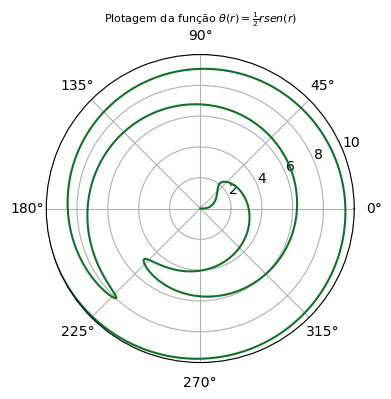

In [265]:
r = np.arange(0, 300, 0.01)
theta = 0.5*r*np.sin(r)

# configuração do eixo
fig, ax = plt.subplots(figsize=(4,4),subplot_kw={'projection': 'polar'})
ax.plot(theta, r,c='#117029')
ax.set_rmax(10)
ax.set_title('Plotagem da função $\\theta(r) = \\frac{1}{2}r sen(r)$', va='center',fontsize=8);

```{admonition} Curiosidade
:class: dropdown
A metodologia do ranking global de universidades [U-Multirank](https://www.umultirank.org) usa 36 indicadores divididos em 5 dimensões (ensino e aprendizagem, pesquisa, transferência de conhecimento, orientação internacional e engajamento regional) para avaliar o desempenho de uma instituição de ensino superior. Essas dimensões são representadas visualmente através de um "gráfico de raios de sol" ([sunburst](https://www.umultirank.org/press-media/media-center/infographics/)), o qual, por sua vez, é construído sob um sistema de coordenadas polares. Porém, apenas as variações radiais (nível de excelência de uma dada dimensão) realmente importam. 
```

## Sistemas geoespaciais

Sistemas geoespaciais são úteis para plotagem de dados cartográficos, mapas e geolocalizações.

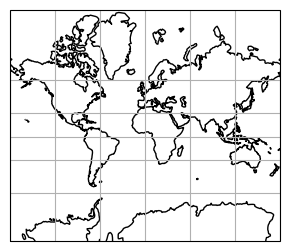

In [274]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

plt.figure(figsize=(3.5, 3))
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
ax.gridlines();

## Visualizações 3D

Visualizações bidimensionais são sempre preferíveis a tridimensionais devido à carga cognitiva exigida para interpretação da informação em 3D. Entretanto, nem sempre é possível atingir representações visuais satisfatórias com apenas 2 dimensões, especialmente quando a terceira dimensão possui variações. Este é o caso de uma superfície descrita como $z = f(x,y)$ em que $z$ é uma elevação de terreno, por exemplo. Eixos 3D são particularmente excelentes quando se quer interagir com ou manipular o visual.

### Visualização de funções matemáticas

O exemplo abaixo mostra como plotar a função dada por
$f(x,y) = 4e^{ - \
     \left[ \left( x -  \frac{a+b}{2} \right)^2  + \
             \left( y -  \frac{c+d}{2} \right)^2 \right] },$
para o domínio bidimensional $[a,b] \times [c,d]$. Esta função, em sentido genérico, poderia bem representar uma pequena montanha, um tipo de chapéu, ou mesmo uma protuberância, tal qual um puxão na pele ou uma ectasia corneana. Independentemente da aplicação, as representações visuais fornecidas forneceriam diferentes posto de vista para o fenômeno, ajudando o _viewer_ a interpretá-lo melhor.

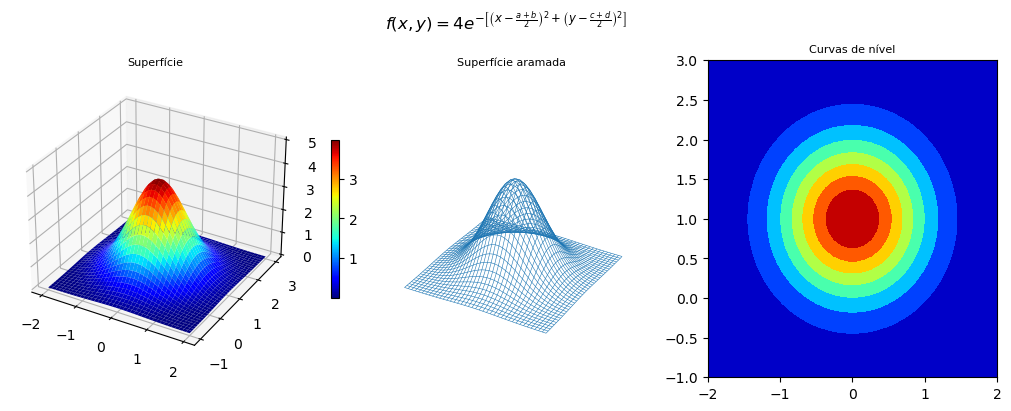

In [267]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# limites do domínio: região do plano [a,b] x [c,d]
a, b = -2, 2
c, d = -1, 3

# no. de pontos em cada direção
nx, ny = 40, 40 

# distribuição dos pontos
x = np.linspace(a,b,nx)
y = np.linspace(c,d,ny)

# grade 2D
[X,Y] = np.meshgrid(x,y)

# superfíe
Z = 4*np.exp(-( ( X - (a+b)/2 )**2 + ( Y - (c+d)/2 )**2 ))

# plotagem
fig = plt.figure(figsize=(10,4),constrained_layout=True)
fig.suptitle('$f(x,y) = 4e^{ - \
     \\left[ \\left( x -  \\frac{a+b}{2} \\right)^2  + \
             \\left( y -  \\frac{c+d}{2} \\right)^2 \\right] }$')

gs = fig.add_gridspec(1,3) 
ax1 = fig.add_subplot(gs[0],projection='3d')
ax2 = fig.add_subplot(gs[1],projection='3d')
ax3 = fig.add_subplot(gs[2])

# superfície
ax1.set_zlim(0,5)
s = ax1.plot_surface(X,Y,Z,cmap=cm.jet)
fig.colorbar(s, shrink=0.5,ax=ax1)
ax1.set_title('Superfície',fontsize=8)

# aramado
ax2.set_zlim(0,5)
s = ax2.plot_wireframe(X,Y,Z,cmap=cm.jet,lw=0.4)
ax2.axis('off')
ax2.set_title('Superfície aramada',fontsize=8)

# curvas de nível com preenchimento
ax3.contourf(X,Y,Z,cmap=cm.jet)
ax3.axis([a,b,c,d])
ax3.set_title('Curvas de nível',fontsize=8);

```{admonition} Curiosidade
:class: dropdown
O [ceratocone](https://pt.wikipedia.org/wiki/Ceratocone) é uma doença da córnea (estrutura do olho humano) que progride a curvatura normal dela, deixando-a cada vez mais no formato de um cone. Consequentemente, o elevado grau ocular faz com que a pessoa acometida da doença tenha uma visão superembaçada. De certa maneira, a superfície deformada da córnea pode ser aproximada por uma função matemática que, não surpreendentemente, dependerá de uma representação visual como a mostrada nesta seção para auxiliar oftalmologistas em seus diagnósticos. 
```


### Visualização de dados multidimensionais categóricos

A representação visual abaixo lida com os preços de combustíveis aplicados em diversos municípios da Paraíba por diferentes operadoras (bandeiras).

In [268]:
import plotly.express as px
from plotly.offline import plot
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = pd.read_csv('../data/preco-combs-pb-2022-02.csv')
fig = px.scatter_3d(df, 
                    x='Produto', 
                    y='Municipio', 
                    z='Bandeira', 
                    size='Valor de Venda', 
                    color='Valor de Venda',
                    hover_data=['Valor de Venda'])
fig.update_layout(margin=dict(l=50, r=50, t=50, b=50),
                  font=dict(size=10))
plot(fig, show_link=False,filename='exemplo-vis-3d.html')
display(HTML('exemplo-vis-3d.html'))